In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/Users/sachinyadav/Downloads/CodeBasics/Healthcare Premium Prediction /Resources/project_1_datacleaning_&_EDA_resources/premiums.xlsx')

In [3]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [4]:
df.shape

(50000, 13)

In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [6]:
df.columns.str.replace(' ','_').str.lower()

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [8]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

### Handling NA values

In [9]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [12]:
df.shape

(49976, 13)

### Handling duplicate values

In [13]:
df.duplicated().sum()

0

In [14]:
df  = df.drop_duplicates()

In [15]:
df.duplicated().value_counts()

False    49976
Name: count, dtype: int64

In [16]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [17]:
df[df['number_of_dependants']<0].shape

(72, 13)

In [18]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [19]:
### it seems like by mistake they were marked as negative but should have been positive

In [20]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [21]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

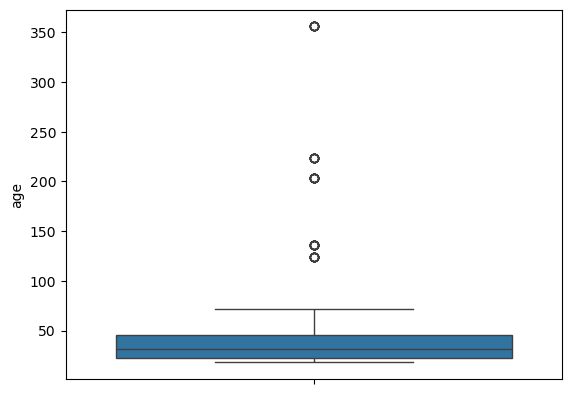

In [23]:
sns.boxplot(df['age'])
plt.show()

In [24]:
num_columns = df.select_dtypes(include = np.number).columns

In [25]:
num_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

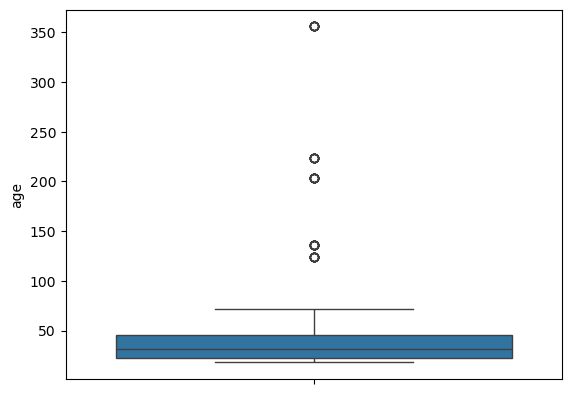

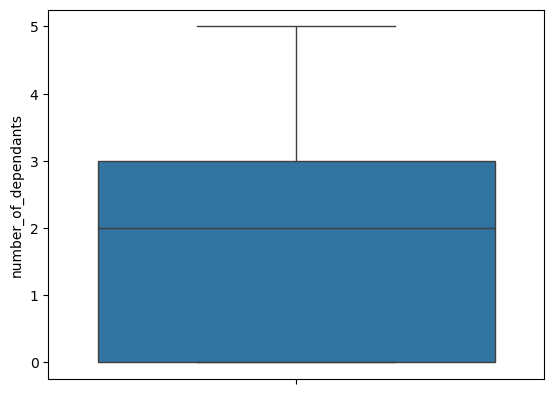

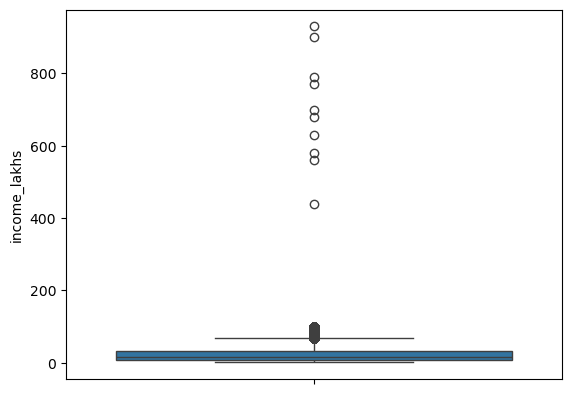

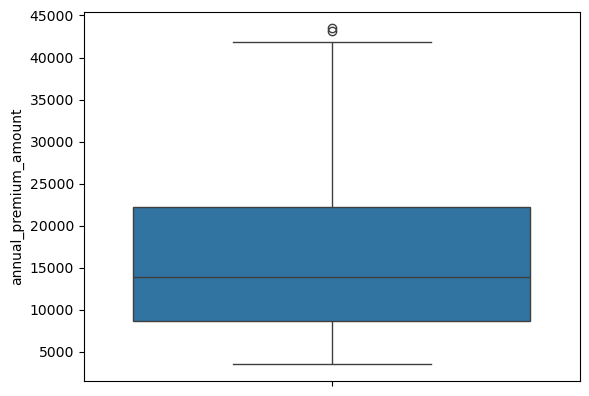

In [26]:
for col in num_columns:
    sns.boxplot(df[col])
    plt.show()

In [27]:
# with common knowledge and discussion with business we can take 100 as a threshold for age

In [28]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [29]:
df1 = df[df['age'] <= 100].copy()

In [30]:
df1.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [31]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

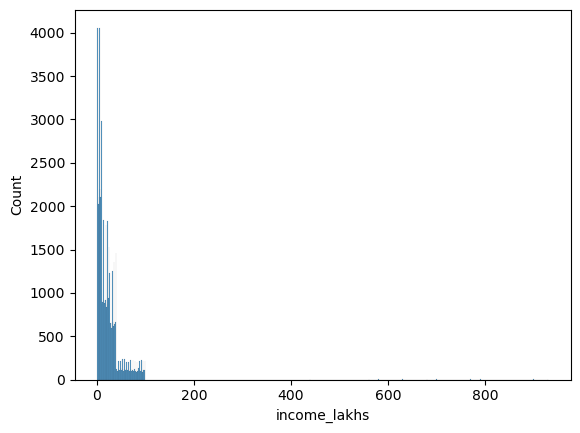

In [32]:
sns.histplot(df1['income_lakhs'])

In [33]:
df['income_lakhs'].quantile(.50)

17.0

In [34]:
def get_iqr_bounds(data,col):
    q1,q3 = data[col].quantile([.25,.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5* iqr
    return lower_bound,upper_bound

In [35]:
get_iqr_bounds(df1,'income_lakhs')

(-29.0, 67.0)

In [36]:
df1['income_lakhs'].quantile(.999)

100.0

In [37]:
# it is not necessary to use iqr always, discuss with business and try to find a good threshold, here after discussing with business 100 seemed fine


In [38]:
df1[df1['income_lakhs']>100]['income_lakhs'].shape

(10,)

In [39]:
# only 10 are there, so we can safely remove them

In [40]:
df2 = df1[df1['income_lakhs']<= 100].copy()

<Axes: xlabel='income_lakhs', ylabel='Count'>

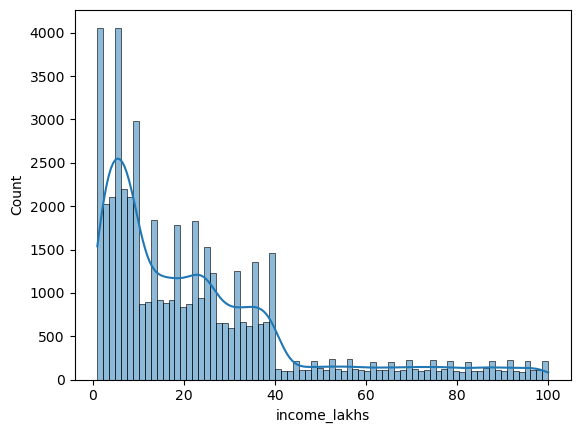

In [41]:
sns.histplot(df2['income_lakhs'],kde = True)

In [42]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


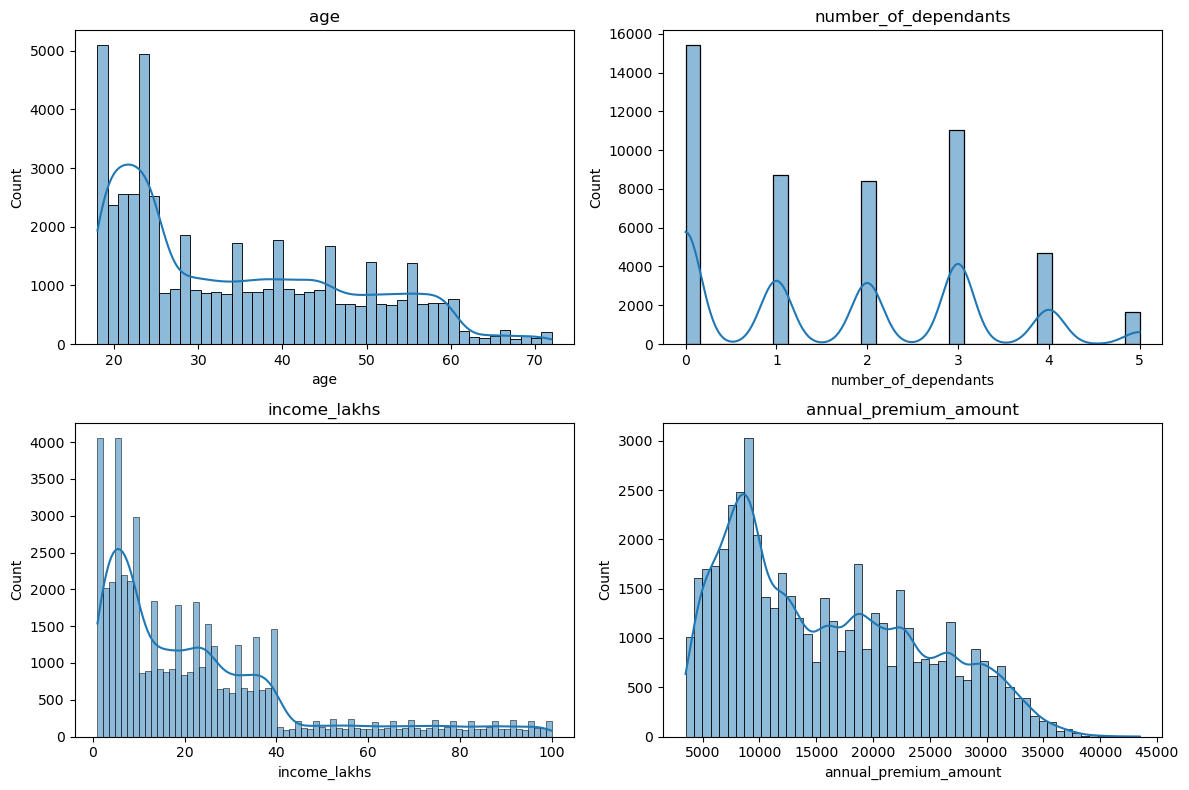

In [43]:
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes = axes.flatten()
for i,col in enumerate(num_columns):
    ax = axes[i]
    sns.histplot(df2[col],kde = True, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

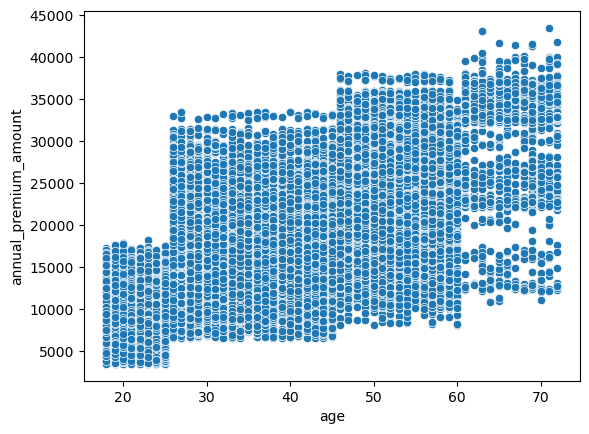

In [44]:
sns.scatterplot(data = df2, x = 'age', y = 'annual_premium_amount')

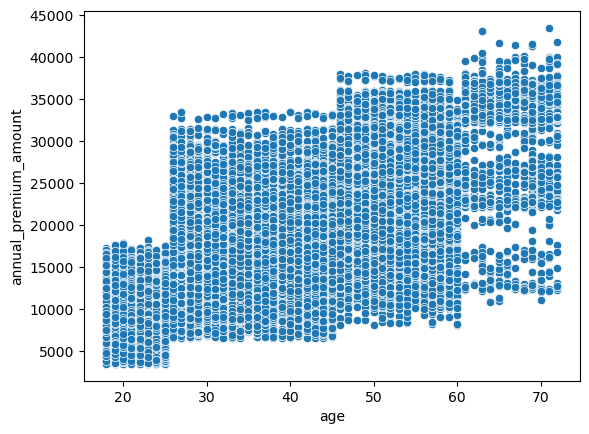

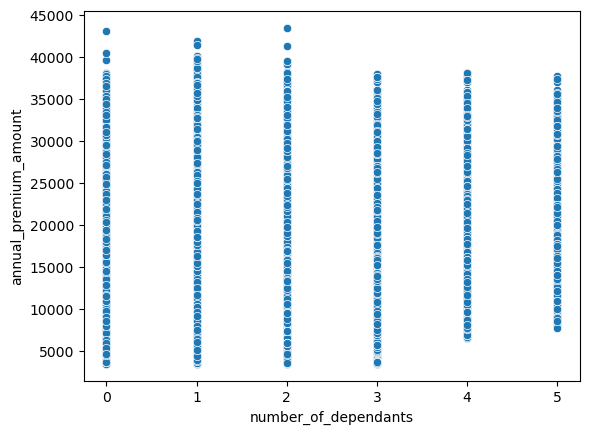

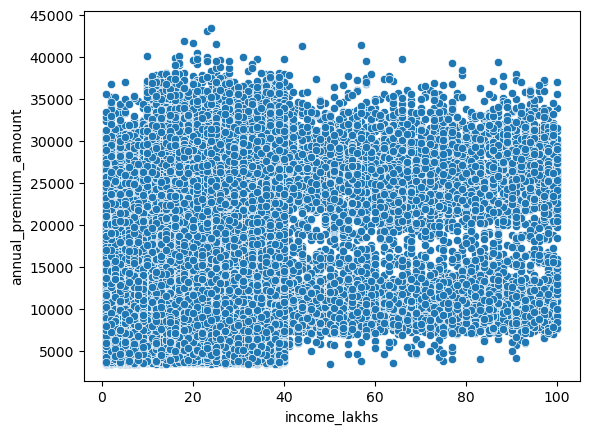

In [45]:
for i in num_columns.drop('annual_premium_amount'):
    sns.scatterplot(data = df2, y = 'annual_premium_amount', x = i)
    plt.show()

In [46]:
cat_columns = df2.select_dtypes(exclude = 'number').columns
cat_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [47]:
for i in cat_columns:
    print(f'{i}: {df2[i].unique()}')

gender: ['Male' 'Female']
region: ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status: ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status: ['Salaried' 'Self-Employed' 'Freelancer']
income_level: ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history: ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan: ['Bronze' 'Silver' 'Gold']


In [48]:
## the smoking status has wrong values lets replace them

In [49]:
smoke = {'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking','Not Smoking':'No Smoking' }
df2['smoking_status'] = df2['smoking_status'].replace(smoke)

In [50]:
for i in cat_columns:
    print(f'{i} : {df2[i].unique()}')

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [51]:
cat_columns.shape

(9,)

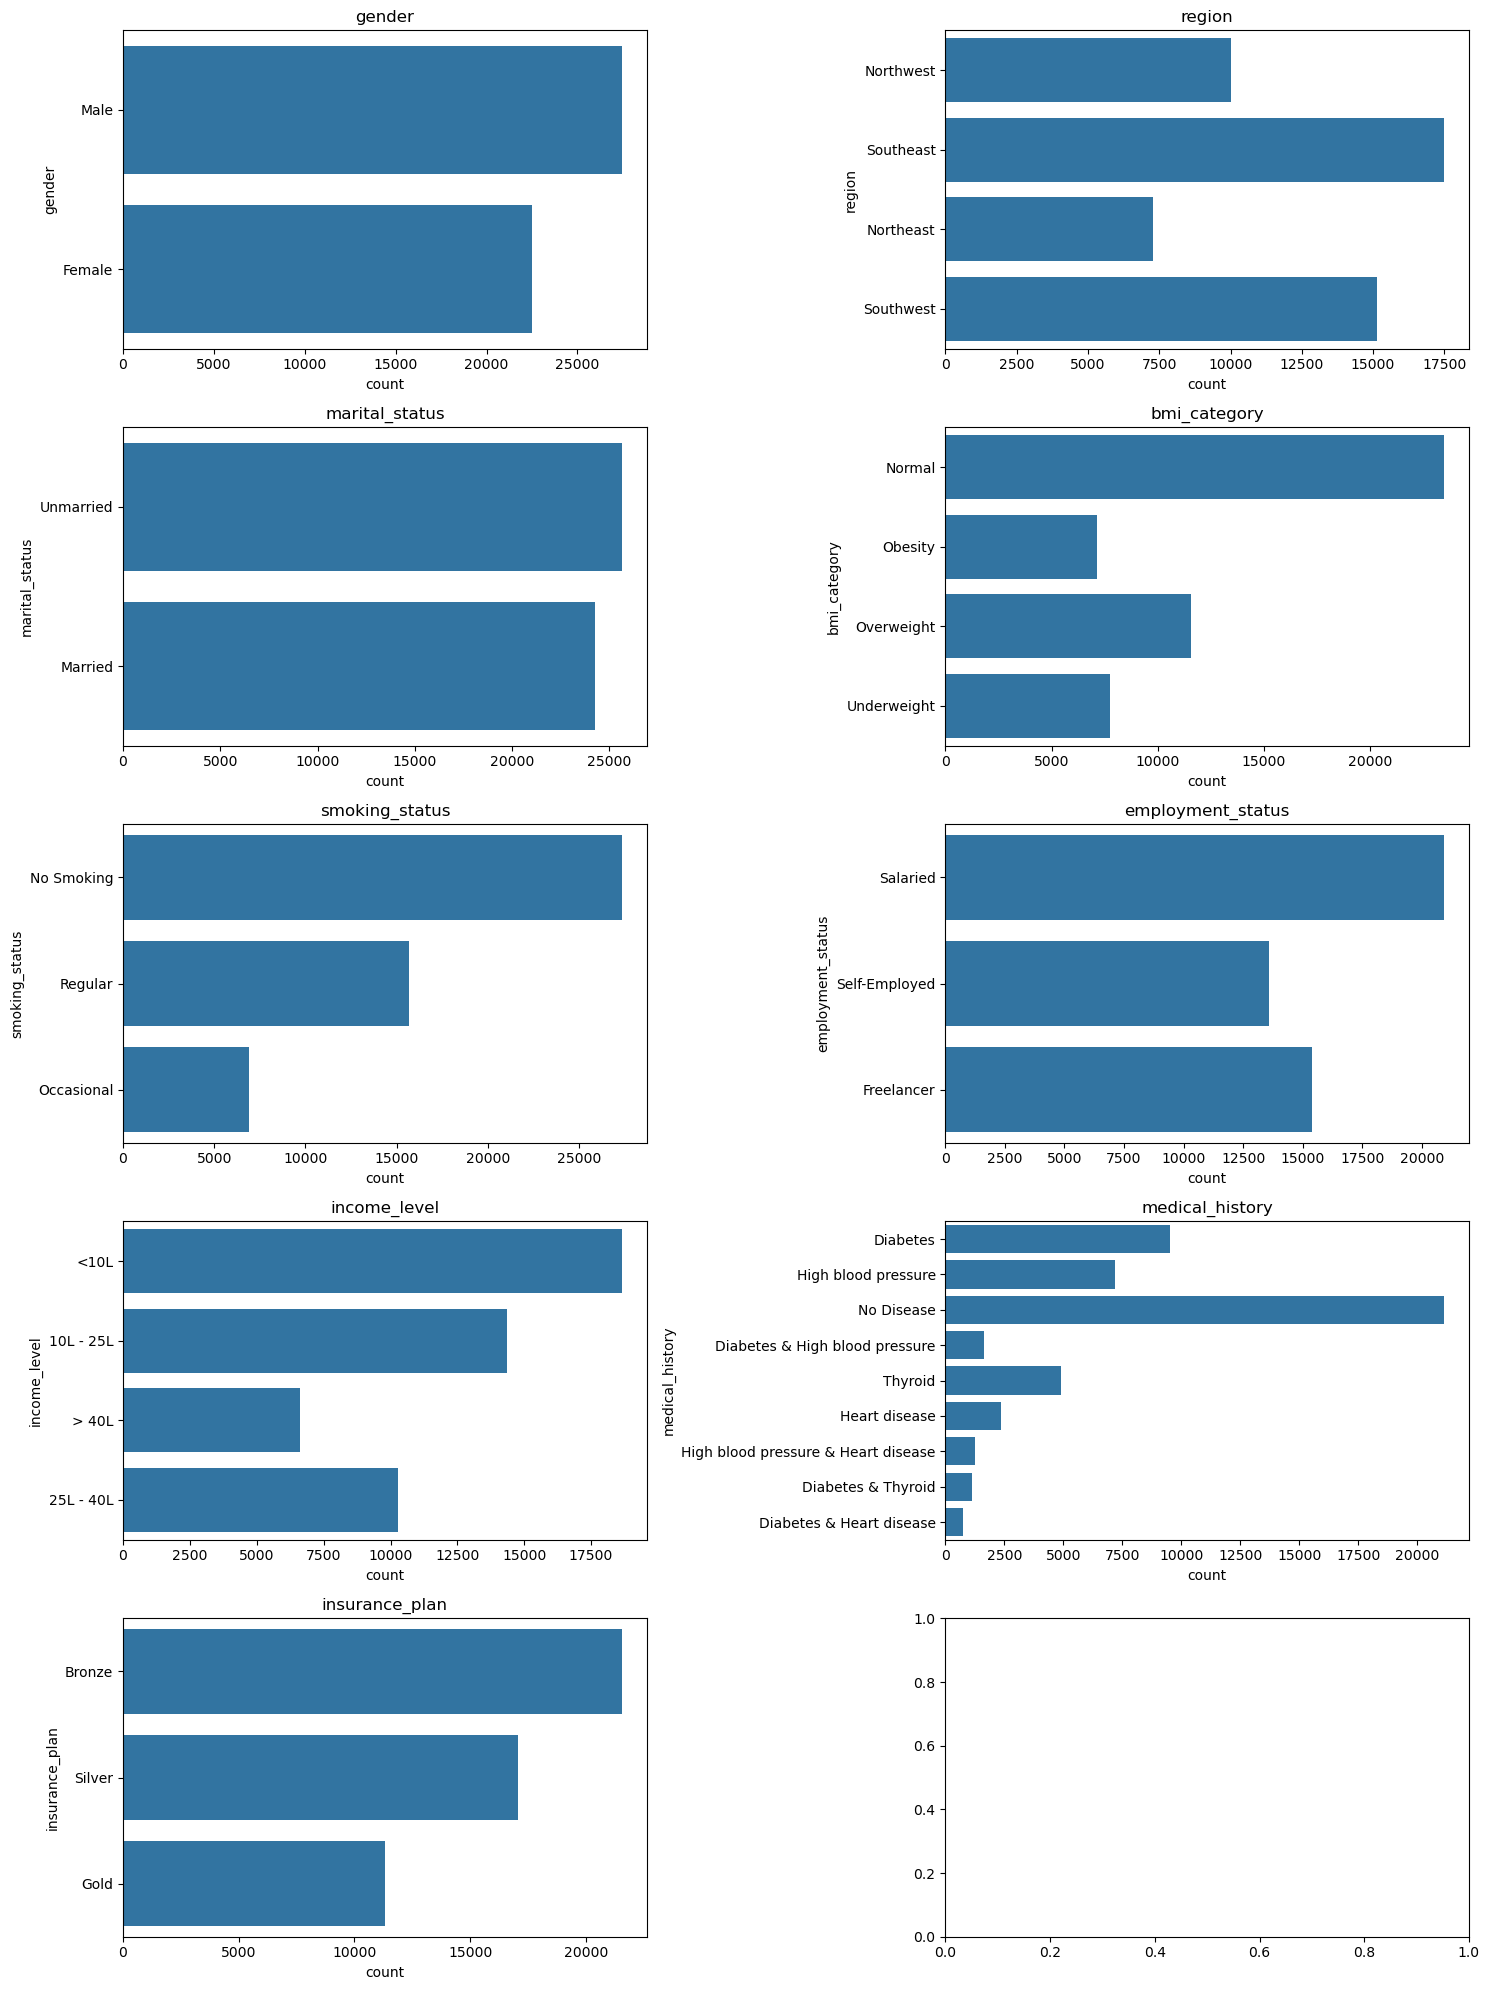

In [52]:
fig, axes = plt.subplots(5,2,figsize = (15,20))
for i,col in enumerate(cat_columns):
    ax = axes[i//2,i%2]
    sns.countplot(df2[col],ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

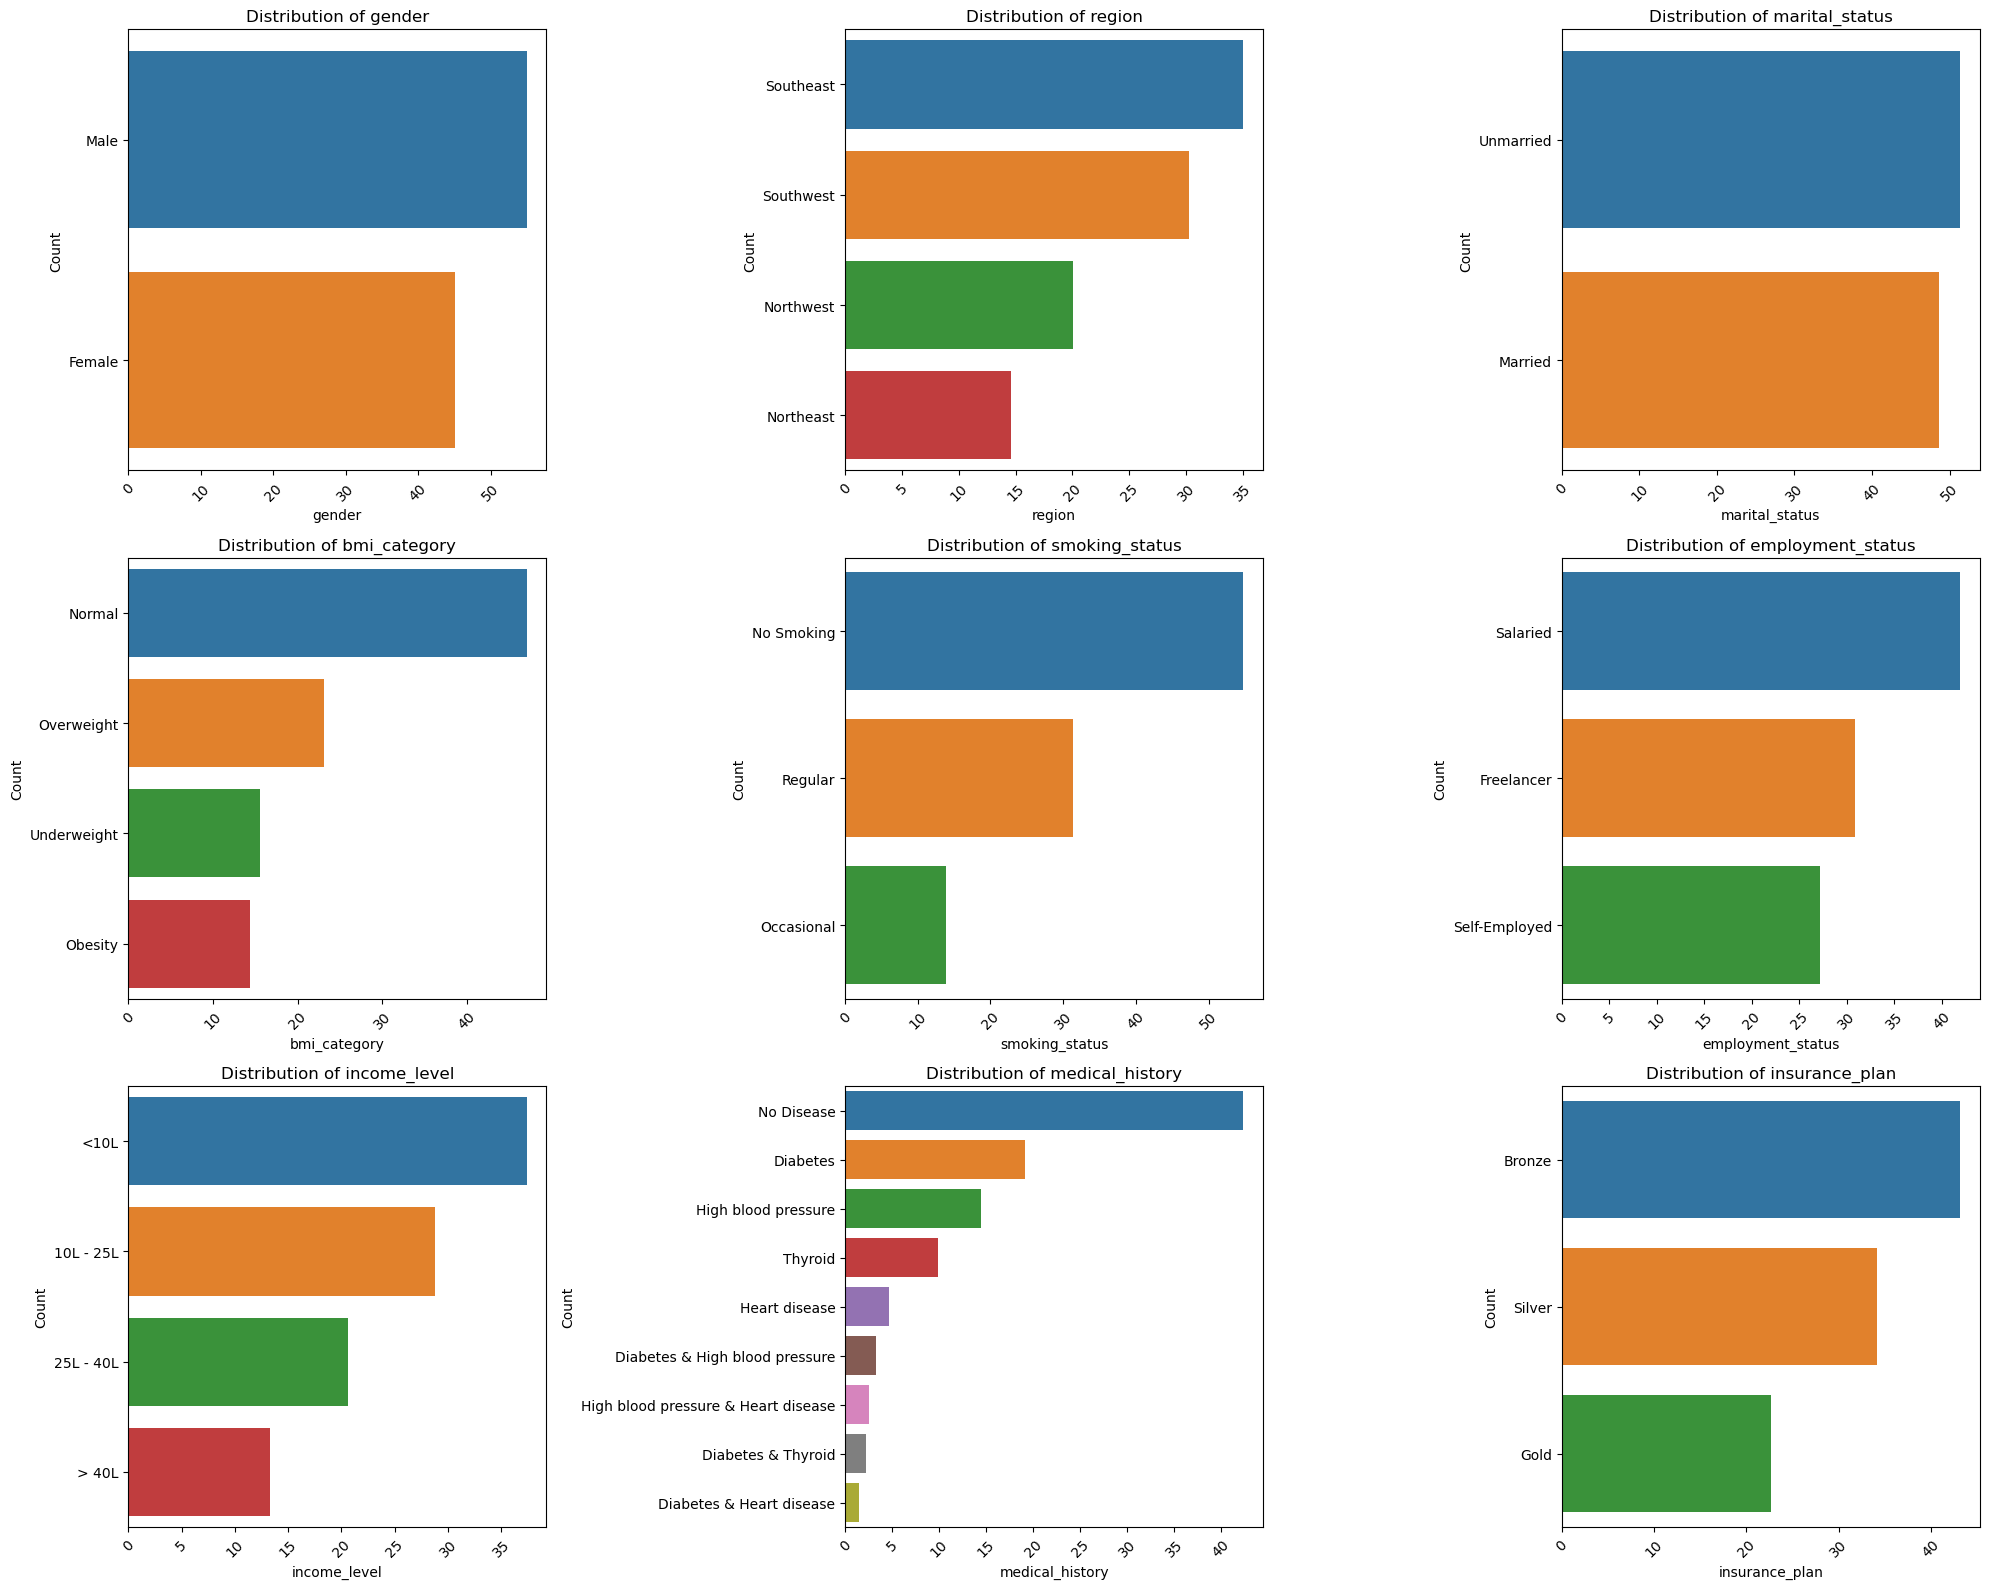

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 grid (since 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()  # Flatten to simplify indexing

for i, col in enumerate(cat_columns):
    ax = axes[i]
    
    # Sort categories by count
    sorted_counts = (df2[col].value_counts(normalize = True)*100).sort_values(ascending=False)
    
    # Plot with sorted order
    sns.barplot(y=sorted_counts.index, x=sorted_counts.values,hue = sorted_counts.index, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [54]:
cross = pd.crosstab(df2['income_level'],df2['insurance_plan'])
cross

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


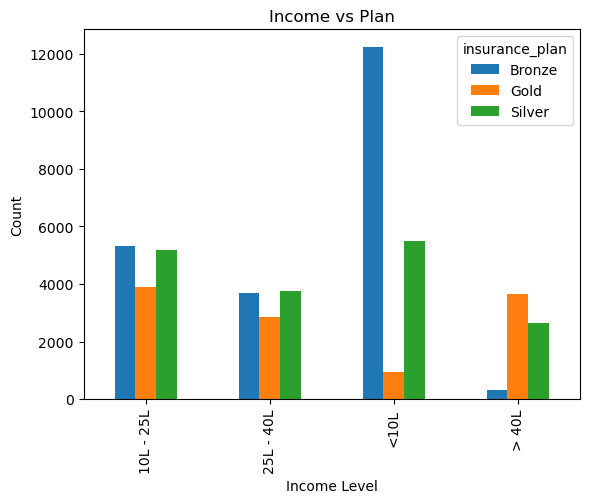

In [55]:
cross.plot(kind = 'bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.xlabel('Income Level')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

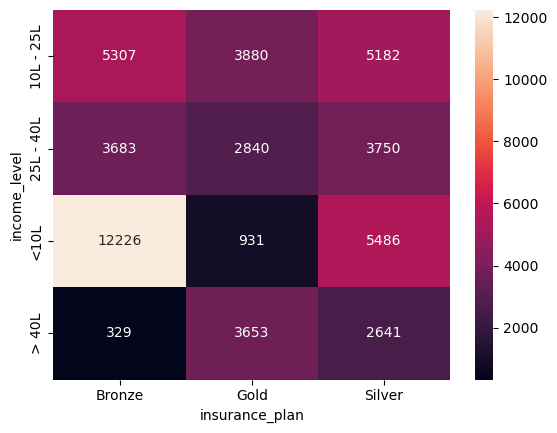

In [56]:
sns.heatmap(cross, annot = True, fmt = 'd')

In [57]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [58]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [59]:
# we want to score each disease and create one disease score for each patient
# based on discussion with business, below list of risk scores was finalised

In [60]:
risk_scores = {'diabetes':6, 'heart disease':8, 'high blood pressure':6,'thyroid':5, 'no disease':0,'none':0}

In [61]:
df2['med_new'] = df2['medical_history'].str.lower().str.split('&')

In [62]:
df2['med_new'] = df2['med_new'].apply(lambda lst: [i.strip() for i in lst])

In [63]:
print(df2['med_new'].sample(5))

36052               [diabetes]
29769             [no disease]
40250    [high blood pressure]
48985               [diabetes]
17113                [thyroid]
Name: med_new, dtype: object


In [64]:
def tot_risk_score(lst):
    tot = 0
    for i in lst:
        tot += risk_scores[i]
    return tot

In [65]:
df2['med_new'].head()

0               [diabetes]
1               [diabetes]
2    [high blood pressure]
3             [no disease]
4    [high blood pressure]
Name: med_new, dtype: object

In [66]:
df2['total_risk_score'] = df2['med_new'].apply(tot_risk_score)

In [67]:
df2.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,med_new,total_risk_score
13693,24,Male,Southwest,Unmarried,1,Underweight,Regular,Freelancer,<10L,5,No Disease,Silver,11289,[no disease],0
41795,60,Male,Southwest,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,23,High blood pressure,Gold,26382,[high blood pressure],6
2856,37,Female,Southwest,Married,2,Obesity,Occasional,Salaried,<10L,8,High blood pressure,Silver,20684,[high blood pressure],6
33434,22,Male,Northwest,Unmarried,0,Overweight,No Smoking,Freelancer,25L - 40L,34,No Disease,Bronze,5159,[no disease],0
24751,42,Male,Southwest,Married,4,Normal,Occasional,Freelancer,10L - 25L,20,Thyroid,Silver,16875,[thyroid],5
40487,22,Female,Southwest,Unmarried,2,Normal,No Smoking,Freelancer,<10L,8,No Disease,Bronze,7256,[no disease],0
16365,22,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,22,No Disease,Bronze,6097,[no disease],0
24273,19,Female,Northwest,Unmarried,1,Overweight,No Smoking,Salaried,10L - 25L,25,No Disease,Bronze,7855,[no disease],0
33158,59,Male,Southeast,Married,2,Overweight,Regular,Self-Employed,<10L,6,Diabetes,Silver,23733,[diabetes],6
6498,26,Male,Southeast,Married,1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269,[no disease],0


In [68]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,total_risk_score
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641,4.085638
std,13.681604,1.492032,22.170699,8418.674061,4.023878
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,22.000000,0.000000,7.000000,8608.000000,0.000000
50%,31.000000,2.000000,17.000000,13928.000000,5.000000
75%,45.000000,3.000000,31.000000,22270.500000,6.000000
max,72.000000,5.000000,100.000000,43471.000000,14.000000


In [69]:
max_risk = df2['total_risk_score'].max()
min_risk = df2['total_risk_score'].min()

In [70]:
df2['norm_risk_score'] = (df2['total_risk_score'] - min_risk)/(max_risk - min_risk)

In [71]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,med_new,total_risk_score,norm_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,[diabetes],6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,[diabetes],6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,[high blood pressure],6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,[no disease],0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,[high blood pressure],6,0.428571


In [72]:
df2 = df2.drop(columns = 'med_new')

In [73]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,6,0.428571


In [74]:
# now lets move to insurance plan

In [75]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [76]:
plans = {'Bronze':1, 'Silver':2, 'Gold':3}

In [77]:
df2['insurance_plan'] = df2['insurance_plan'].map(plans)

In [78]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,6,0.428571


In [79]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [80]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4 })

In [81]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,4,77,No Disease,3,20303,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,6,0.428571


In [82]:
df2.dtypes

age                        int64
gender                    object
region                    object
marital_status            object
number_of_dependants       int64
bmi_category              object
smoking_status            object
employment_status         object
income_level               int64
income_lakhs               int64
medical_history           object
insurance_plan             int64
annual_premium_amount      int64
total_risk_score           int64
norm_risk_score          float64
dtype: object

In [83]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'total_risk_score', 'norm_risk_score'],
      dtype='object')

In [84]:
df2.select_dtypes(exclude = 'number').columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'medical_history'],
      dtype='object')

In [85]:
col_for_hot_enc = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']

In [86]:
df3 = pd.get_dummies(df2, columns = col_for_hot_enc, drop_first = True,dtype = int).copy()

In [87]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,total_risk_score,norm_risk_score,gender_Male,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,6,0.428571,1,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,6,0.428571,0,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,6,0.428571,0,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,0,0.000000,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,6,0.428571,1,...,0,0,1,0,1,0,0,1,0,1


In [88]:
df3 = df3.drop(columns = ['medical_history','total_risk_score'])

In [89]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [90]:
cm = df3.corr()
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,0.415742,0.029851,0.025060,0.496317,0.767569,0.442773,-0.002219,0.000464,0.003305,-0.003424,-0.543104,0.152496,0.153148,-0.115888,0.066596,0.059380,-0.008093,0.314684
number_of_dependants,0.415742,1.000000,0.006564,0.006074,0.256459,0.414691,0.371498,-0.003093,0.001693,0.003620,-0.000339,-0.841717,0.115397,0.110451,-0.093881,0.071762,0.094829,0.067066,0.115930
income_level,0.029851,0.006564,1.000000,0.906830,0.440428,0.271811,0.013506,0.063108,-0.003324,-0.000259,0.009367,-0.012994,-0.002244,0.007947,0.000350,-0.001340,0.020275,-0.134032,0.139333
income_lakhs,0.025060,0.006074,0.906830,1.000000,0.410753,0.243058,0.009626,0.039126,-0.005192,-0.001250,0.009929,-0.011099,0.000314,0.007150,-0.000740,0.002306,0.010948,-0.100510,0.109759
insurance_plan,0.496317,0.256459,0.440428,0.410753,1.000000,0.834148,0.260932,0.034211,-0.002821,0.004082,-0.000977,-0.316800,0.094698,0.098639,-0.073881,0.037351,0.059587,-0.041582,0.223947
annual_premium_amount,0.767569,0.414691,0.271811,0.243058,0.834148,1.000000,0.519458,0.064470,-0.005078,0.008235,-0.003828,-0.516350,0.249847,0.187103,-0.135289,0.060610,0.198829,-0.005442,0.289438
norm_risk_score,0.442773,0.371498,0.013506,0.009626,0.260932,0.519458,1.000000,-0.003754,-0.005627,0.002019,-0.000132,-0.433916,0.101039,0.102556,-0.087996,0.071090,0.093822,0.059511,0.135824
gender_Male,-0.002219,-0.003093,0.063108,0.039126,0.034211,0.064470,-0.003754,1.000000,-0.003287,-0.002988,0.001873,0.003944,-0.031351,0.080588,-0.043000,-0.045618,0.305180,0.005559,0.001055
region_Northwest,0.000464,0.001693,-0.003324,-0.005192,-0.002821,-0.005078,-0.005627,-0.003287,1.000000,-0.368277,-0.330654,-0.001083,-0.002262,0.001194,-0.002017,-0.000669,-0.000255,0.004574,0.000110
region_Southeast,0.003305,0.003620,-0.000259,-0.001250,0.004082,0.008235,0.002019,-0.002988,-0.368277,1.000000,-0.484271,-0.003980,0.006373,0.002511,0.000211,-0.002191,-0.000401,-0.006575,0.003287


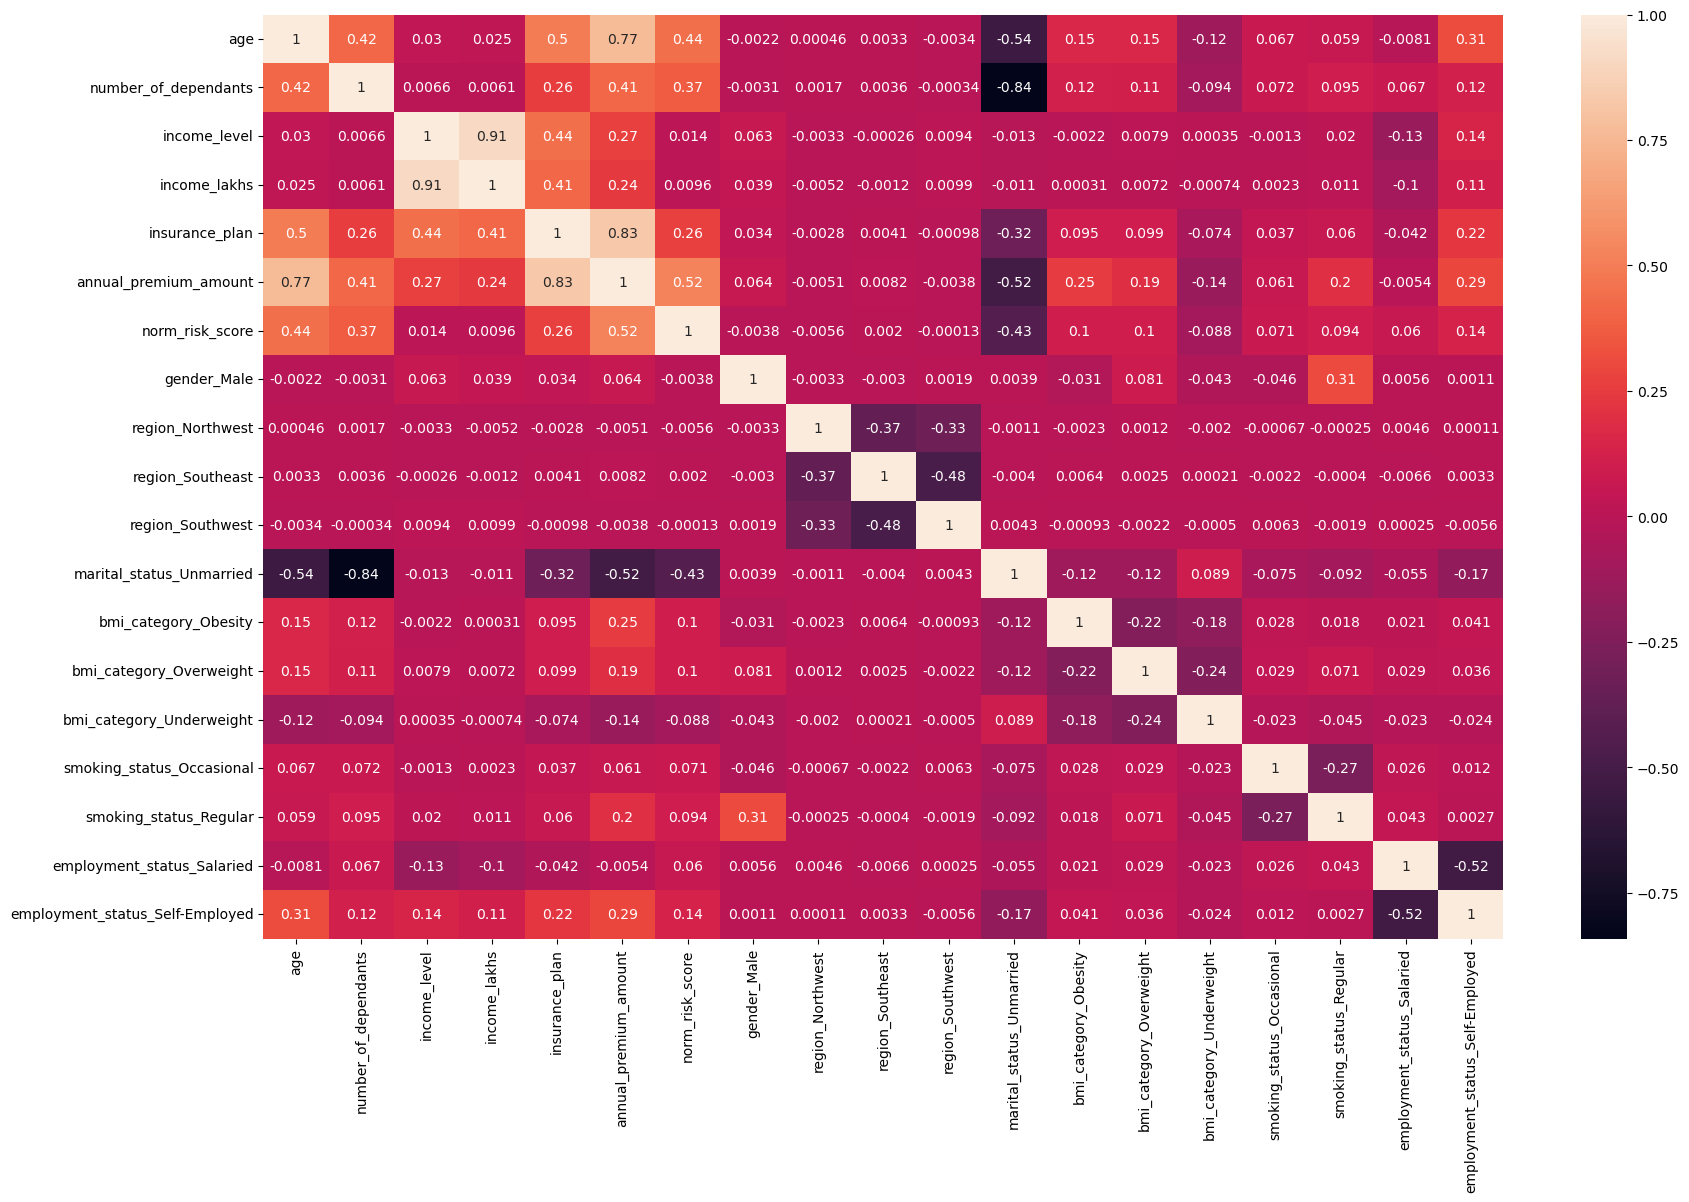

In [91]:
plt.figure(figsize = (20,12))
sns.heatmap(cm,annot = True)
plt.show()

In [92]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'norm_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [93]:
X = df3.drop(columns = 'annual_premium_amount')
y = df3['annual_premium_amount']

In [94]:
# scaling the features before using vif for feature selection

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs','insurance_plan']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [97]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [98]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
def get_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data,i) for i in range(data.shape[1])]
    return vif_df

In [101]:
get_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,norm_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [102]:
# as we can see here, income level and income lakhs have vif> 10
# remove feature iteratively and not in a bunch

In [103]:
get_vif(X.drop(columns = 'income_level'))

,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,norm_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [104]:
# as we can see now the vif are well below 5, we need not remove any other features

In [105]:
X_reduced = X.drop(columns = 'income_level')

In [106]:
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


### Model Training

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [109]:
X_train,X_test, y_train,y_test = train_test_split(X_reduced,y,test_size = .3,random_state = 3)

In [111]:
print(X_train.shape)
print(X_test.shape)

(34935, 17)
(14973, 17)


In [114]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [115]:
lr_model.score(X_test,y_test)

0.927417778466076

In [116]:
#to check overfitting lets see score on train as well

In [117]:
lr_model.score(X_train,y_train)

0.9284966150065567

In [118]:
# these are almost same, so our model is not overfitting

In [119]:
lr_model.coef_

array([ 1.12505141e+04, -6.22397918e+02, -4.57522531e+02,  1.25367035e+04,
        4.81646577e+03,  1.42366670e+02, -1.44401931e+01,  1.13617555e+01,
       -3.00974496e+01, -8.78062380e+02,  3.33118216e+03,  1.62168790e+03,
        3.71614962e+02,  6.96517403e+02,  2.23457767e+03,  1.39598405e+02,
        3.70464600e+02])

In [120]:
lr_model_coef_df = pd.DataFrame({'Feature':X_train.columns, 'Coef': lr_model.coef_})

In [121]:
lr_model_coef_df

,Feature,Coef
0,age,11250.514062
1,number_of_dependants,-622.397918
2,income_lakhs,-457.522531
3,insurance_plan,12536.703455
4,norm_risk_score,4816.465775
5,gender_Male,142.366670
6,region_Northwest,-14.440193
7,region_Southeast,11.361756
8,region_Southwest,-30.097450
9,marital_status_Unmarried,-878.062380


<Axes: xlabel='Feature'>

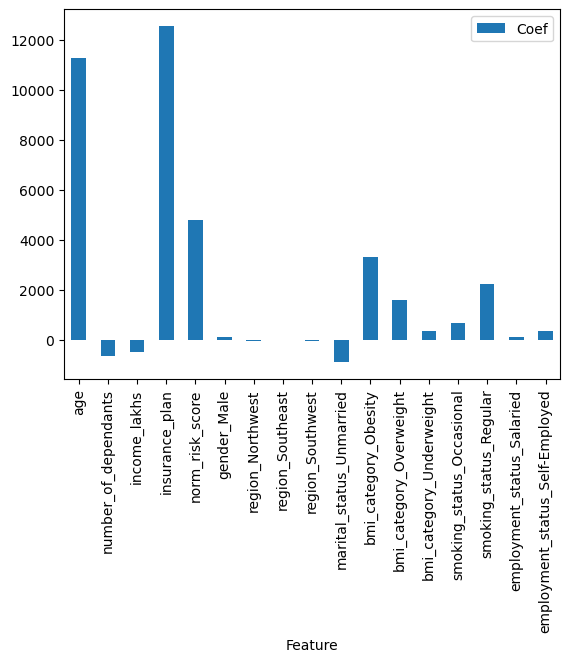

In [126]:
lr_model_coef_df.plot(x = 'Feature',kind= 'bar')

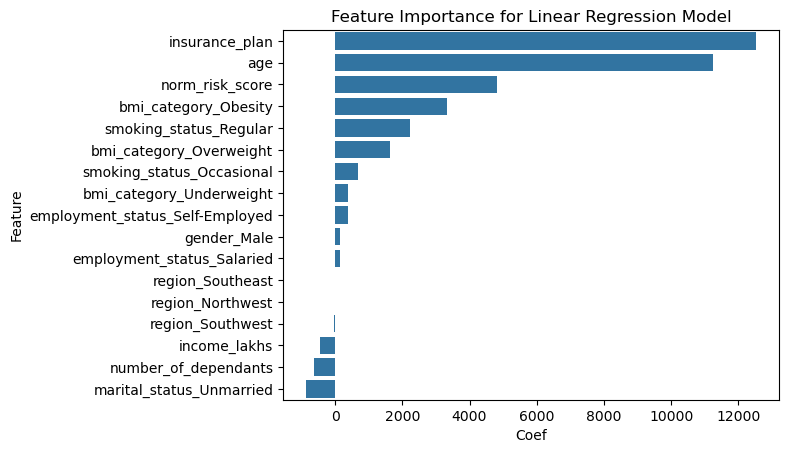

In [133]:
sns.barplot(data = lr_model_coef_df.sort_values(by = 'Coef',ascending = False),y = 'Feature',x = 'Coef')
plt.title('Feature Importance for Linear Regression Model')
plt.show()

In [137]:
from sklearn.linear_model import Ridge, Lasso

In [138]:
rg_model = Ridge()
rg_model.fit(X_train,y_train)
rg_model.score(X_test,y_test)

0.9274184107683815

In [139]:
ls_model = Lasso()
ls_model.fit(X_train,y_train)
ls_model.score(X_test,y_test)

0.9274202589681148

In [143]:
from xgboost import XGBRegressor

In [144]:
xg_model = XGBRegressor()

In [147]:
xg_model.fit(X_train,y_train)
xg_model.score(X_test,y_test)

0.9810099005699158

In [148]:
xg_model.score(X_train,y_train)

0.9860697388648987

In [150]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [151]:
y_lr_pred = lr_model.predict(X_test)
y_xg_pred = xg_model.predict(X_test)

In [152]:
print(f'Log Reg r2 = {r2_score(y_test,y_lr_pred)}, rmse = {root_mean_squared_error(y_test,y_lr_pred)}')
print(f'XGBoost r2 = {r2_score(y_test,y_xg_pred)}, rmse = {root_mean_squared_error(y_test,y_xg_pred)}')


Log Reg r2 = 0.927417778466076, rmse = 2269.565821052342
XGBoost r2 = 0.9810099005699158, rmse = 1160.8909936619289


In [153]:
#So XGBoost is the clearly better model here

### Hyperparameter Tuning

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [158]:
param_grid = {'n_estimators': [20,40,50],
             'learning_rate': [.01,.1,.2],
             'max_depth': [3,4,5]}
random_search = RandomizedSearchCV(XGBRegressor(),param_grid,n_iter = 10,cv = 3,scoring = 'r2')
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [20, 40, 50]},
                   scoring='r2')

In [159]:
random_search.best_score_

0.9818446238835653

In [161]:
random_search.best_params_

{'n_estimators': 40, 'max_depth': 5, 'learning_rate': 0.2}

In [162]:
best_model = random_search.best_estimator_

In [163]:
best_model.feature_importances_

array([3.6729282e-01, 2.3652014e-04, 2.3418650e-04, 5.4537642e-01,
       2.1178823e-02, 1.3091789e-04, 2.4526531e-04, 1.4962358e-04,
       2.9930548e-04, 3.8091961e-04, 2.5109475e-02, 1.4417593e-02,
       1.1205870e-03, 2.7697287e-03, 2.0386962e-02, 3.0730132e-04,
       3.6351933e-04], dtype=float32)

In [165]:
df_feat_imp = pd.DataFrame()
df_feat_imp['columns'] = X_train.columns
df_feat_imp['feature_importances'] = best_model.feature_importances_

In [170]:
df_feat_imp = df_feat_imp.rename(columns = {'columns':'features','feature_importances':'importance'})

In [172]:
df_feat_imp

,features,importance
0,age,0.367293
1,number_of_dependants,0.000237
2,income_lakhs,0.000234
3,insurance_plan,0.545376
4,norm_risk_score,0.021179
5,gender_Male,0.000131
6,region_Northwest,0.000245
7,region_Southeast,0.000150
8,region_Southwest,0.000299
9,marital_status_Unmarried,0.000381


<Axes: xlabel='importance', ylabel='features'>

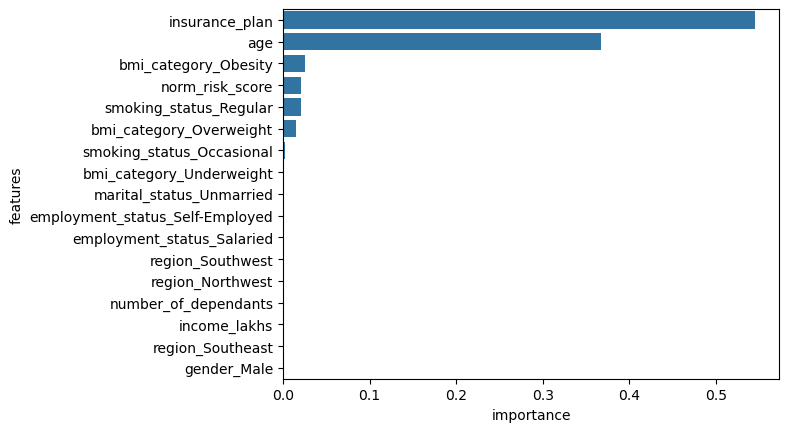

In [174]:
sns.barplot(data = df_feat_imp.sort_values(by = 'importance',ascending = False), y= 'features',x = 'importance')

### Error Analysis

In [175]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

In [176]:
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

In [177]:
results_df.head()

,actual,predicted,diff,diff_pct
9420,14010,14301.510742,291.510742,2.080733
35080,4356,7001.542969,2645.542969,60.733310
5445,34328,34410.488281,82.488281,0.240294
21174,33761,33535.726562,-225.273438,-0.667259
15608,5811,6565.687988,754.687988,12.987231


In [180]:
results_df.describe()

,actual,predicted,diff,diff_pct
count,14973.000000,14973.000000,14973.000000,14973.000000
mean,15844.472317,15850.262695,5.789874,2.500817
std,8424.461643,8330.543945,1134.251252,17.203129
min,3501.000000,6399.064453,-3913.569336,-36.955329
25%,8628.000000,7372.325684,-390.994141,-2.048186
50%,14017.000000,14052.032227,5.427734,0.026247
75%,22304.000000,22479.316406,389.824219,2.348253
max,41317.000000,41310.859375,4536.996094,87.837281


In [202]:
# As we can see, the error percentage is as high as 87 percent. So our model is not performing very well

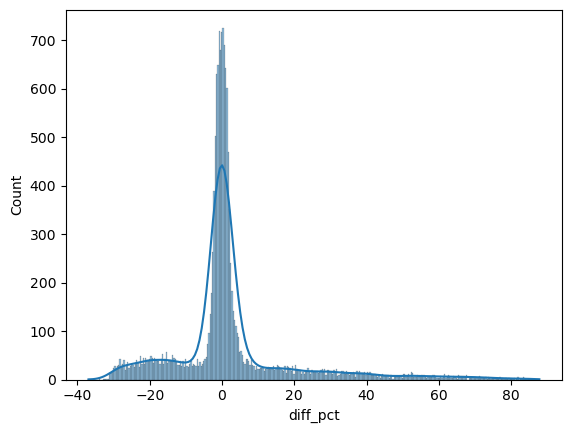

In [179]:
sns.histplot(results_df['diff_pct'],kde =True)
plt.show()

In [203]:
# After discussing with business, we came to a threshold of 10 percent. We have to try and contain the error within 10 percent'

In [195]:
extreme_error_threshold = 10
extreme_results_df = results_df[abs(results_df['diff_pct'])>extreme_error_threshold]

In [196]:
extreme_results_df.shape

(4376, 4)

In [197]:
results_df.shape

(14973, 4)

In [198]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

29.225940025379014

In [205]:
# So almost 30 percent of times our model is giving wrong answers which is more than 10 percent off from actual values

In [206]:
results_df[abs(results_df['diff_pct'])>50].shape

(515, 4)

In [207]:
# Almost 515 records have more than 50 % error

In [210]:
# We need to do some deeper analysis to find why are we getting such high error rates. 
#Is it specific to some feature (specific income group or age group etc) or something else

In [211]:
# we have results df, now we want to see original features for same, we can use index here

In [212]:
results_df.head()

,actual,predicted,diff,diff_pct
9420,14010,14301.510742,291.510742,2.080733
35080,4356,7001.542969,2645.542969,60.733310
5445,34328,34410.488281,82.488281,0.240294
21174,33761,33535.726562,-225.273438,-0.667259
15608,5811,6565.687988,754.687988,12.987231


In [213]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
9420,0.166667,0.6,0.040404,0.0,0.857143,0,0,0,0,0,0,0,0,0,1,1,0
35080,0.037037,0.4,0.080808,0.0,0.000000,0,0,1,0,1,0,1,0,0,0,0,0
5445,0.537037,0.6,0.151515,1.0,1.000000,0,0,0,1,0,1,0,0,0,0,0,1
21174,0.722222,0.4,0.919192,1.0,0.428571,1,1,0,0,1,1,0,0,0,1,0,1
15608,0.129630,0.2,0.020202,0.0,0.000000,0,0,1,0,1,0,0,0,0,0,1,0


In [223]:
req_index = extreme_results_df.index
extreme_errors_df = X_test.loc[req_index]

In [224]:
extreme_errors_df.shape

(4376, 17)

In [225]:
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
35080,0.037037,0.4,0.080808,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
15608,0.129630,0.2,0.020202,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,0
42721,0.018519,0.2,0.000000,0.5,0.0,0,0,1,0,1,0,0,0,0,0,0,0
44459,0.000000,0.0,0.101010,0.5,0.0,1,0,0,0,1,0,0,0,1,0,0,1
37494,0.129630,0.2,0.050505,0.0,0.0,0,0,0,0,1,0,0,0,0,1,1,0


In [240]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
9420,0.166667,0.6,0.040404,0.0,0.857143,0,0,0,0,0,0,0,0,0,1,1,0
35080,0.037037,0.4,0.080808,0.0,0.000000,0,0,1,0,1,0,1,0,0,0,0,0
5445,0.537037,0.6,0.151515,1.0,1.000000,0,0,0,1,0,1,0,0,0,0,0,1
21174,0.722222,0.4,0.919192,1.0,0.428571,1,1,0,0,1,1,0,0,0,1,0,1
15608,0.129630,0.2,0.020202,0.0,0.000000,0,0,1,0,1,0,0,0,0,0,1,0


<Axes: xlabel='income_lakhs', ylabel='Count'>

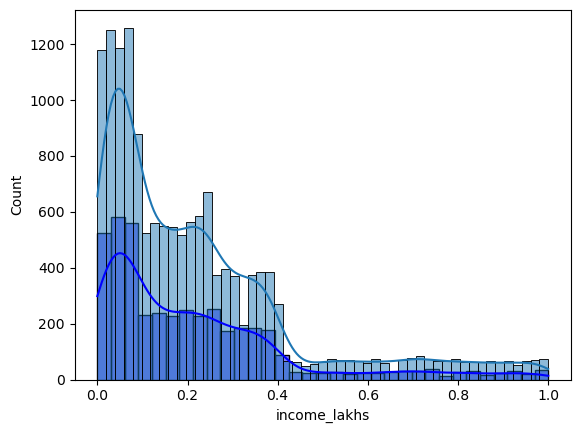

In [247]:
sns.histplot(extreme_errors_df['income_lakhs'],kde = True,color = 'blue')
sns.histplot(X_test['income_lakhs'],kde = True)

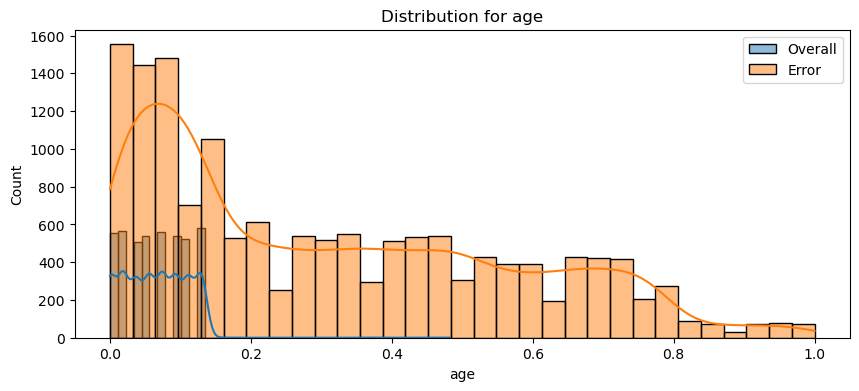

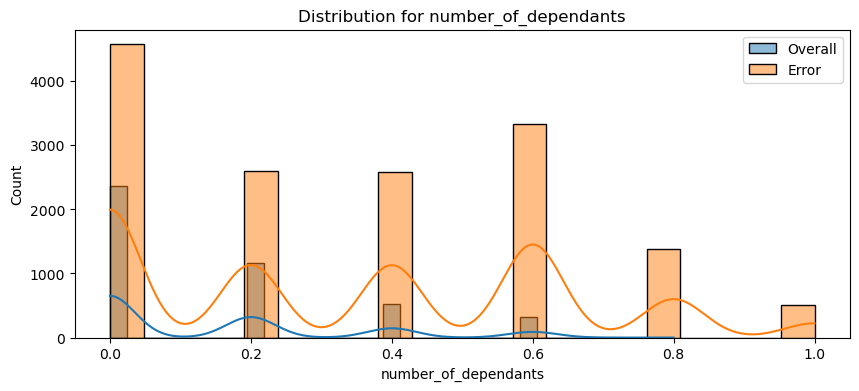

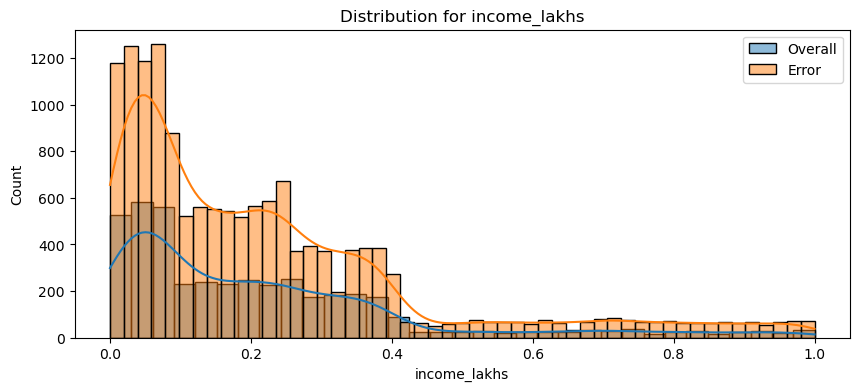

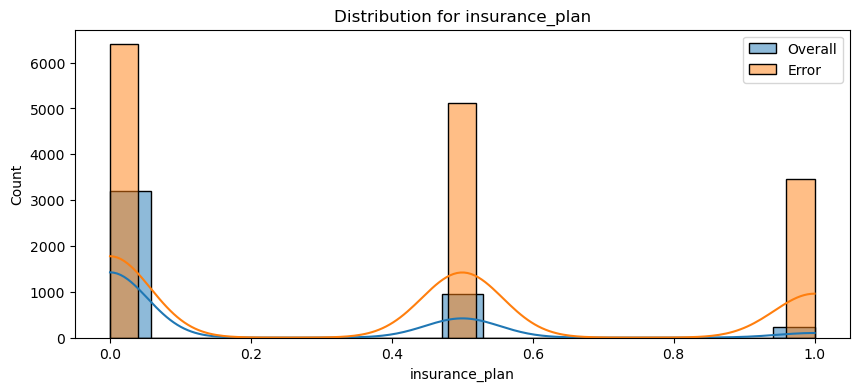

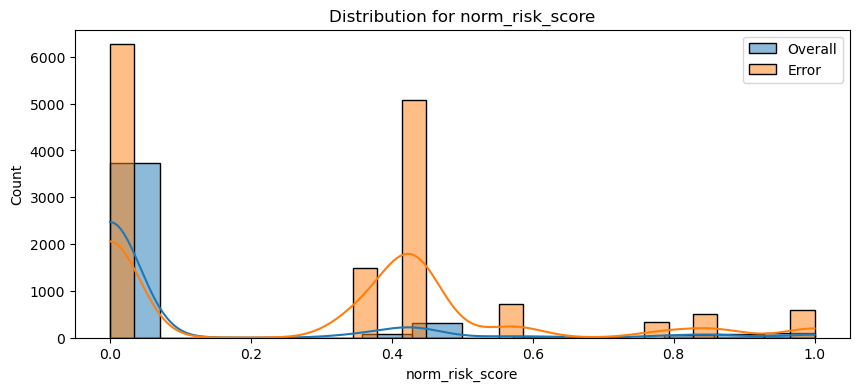

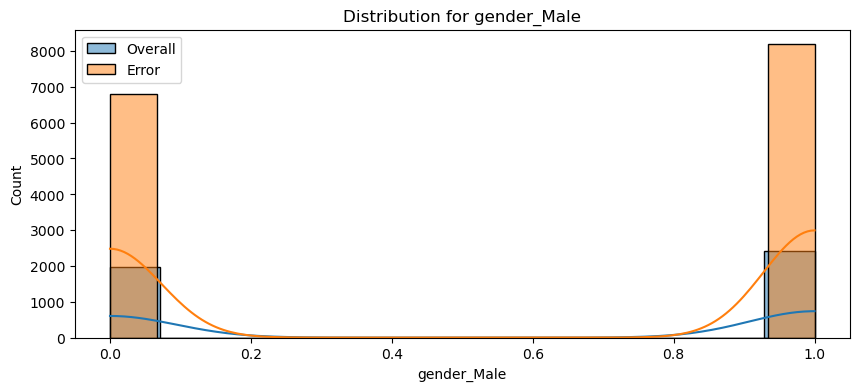

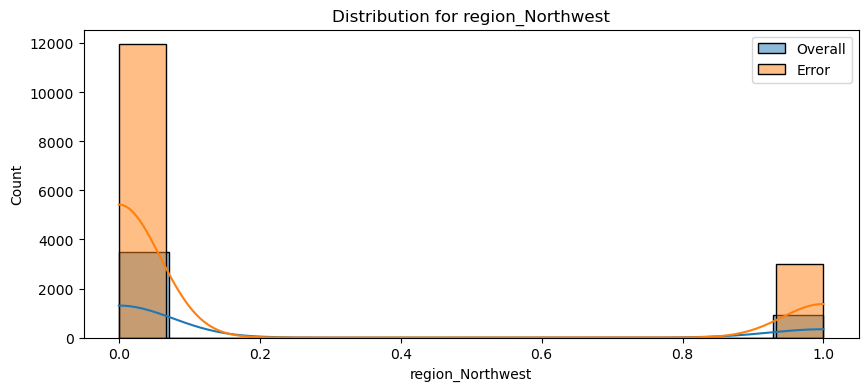

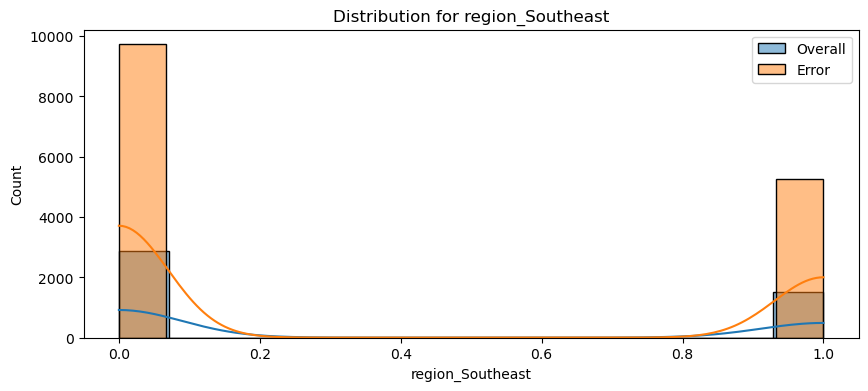

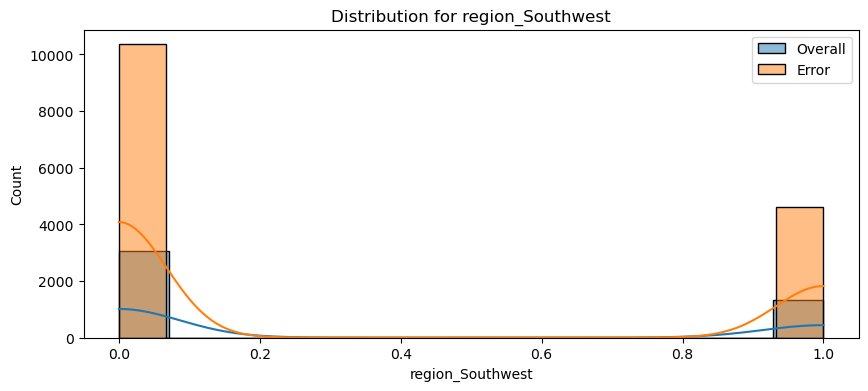

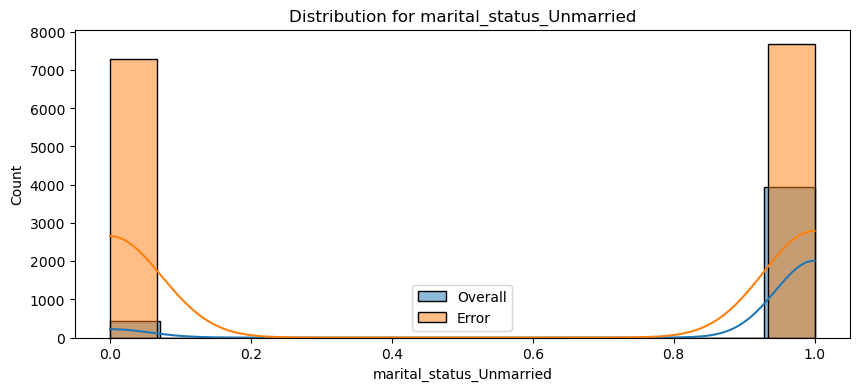

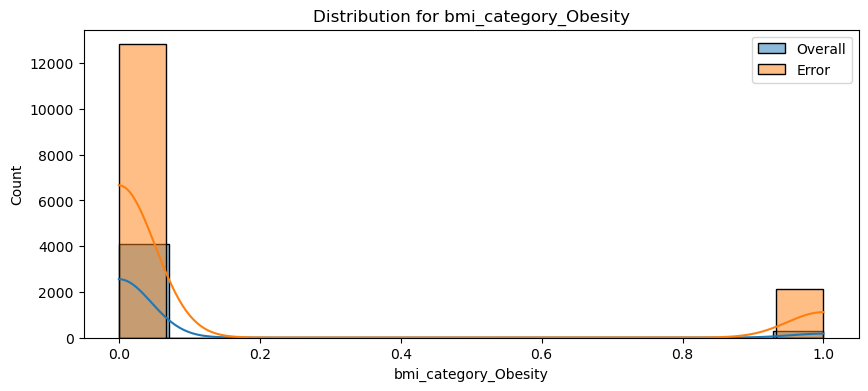

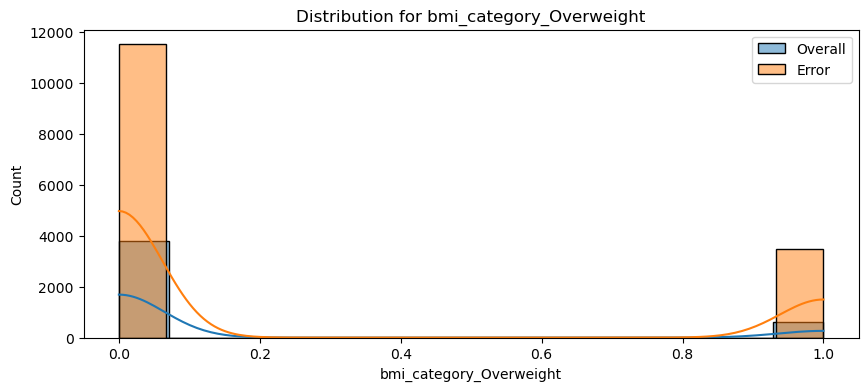

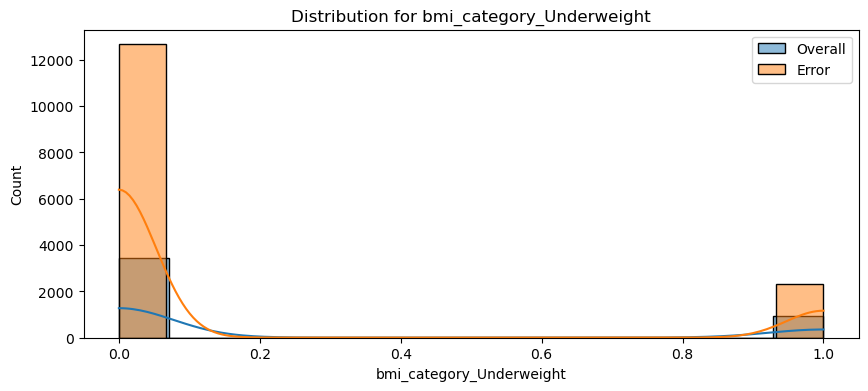

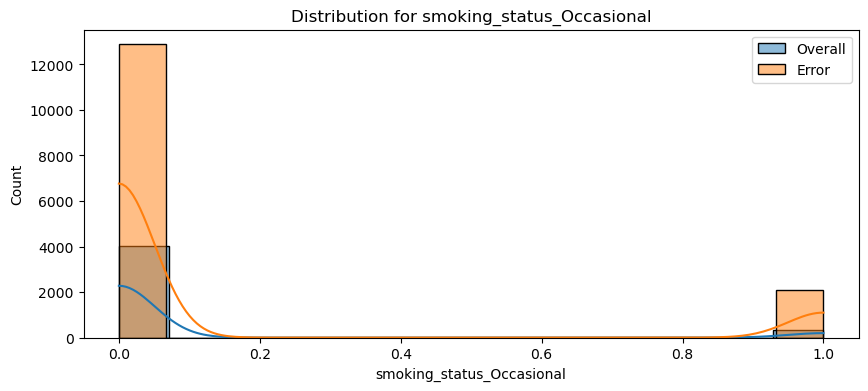

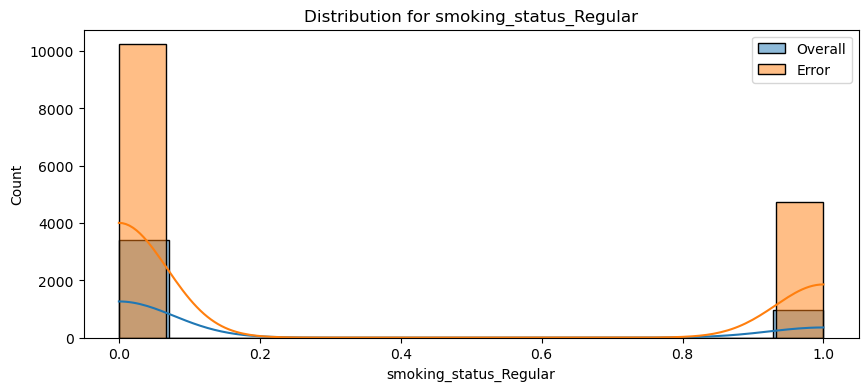

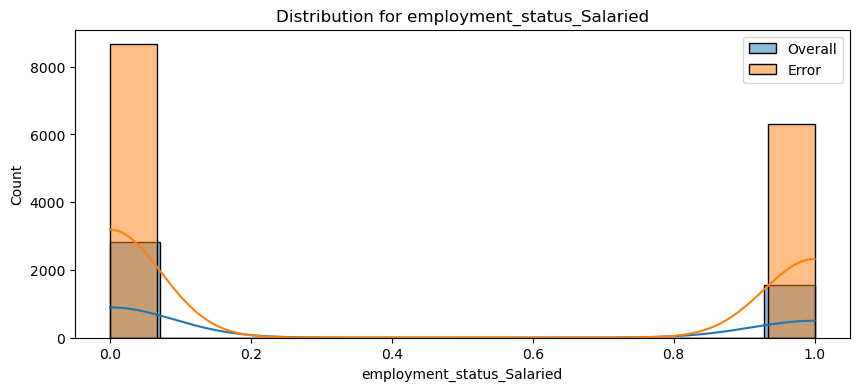

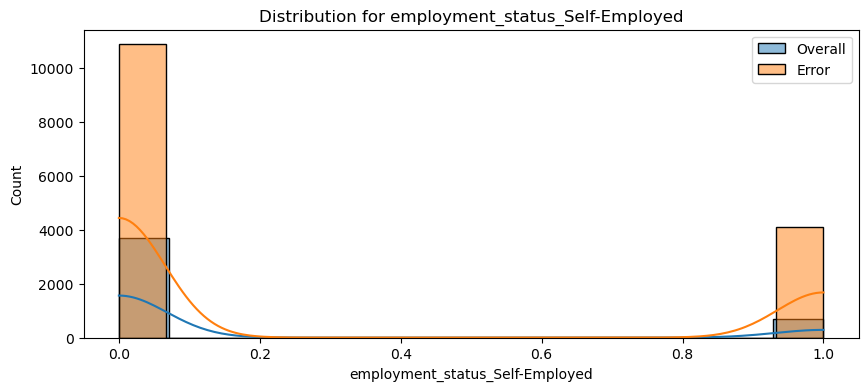

In [258]:
for feature in extreme_errors_df.columns:
    plt.figure(figsize = (10,4))
    sns.histplot(extreme_errors_df[feature],kde = True,label = 'Overall')
    sns.histplot(X_test[feature],kde = True,label = 'Error')
    plt.title(f'Distribution for {feature}')
    plt.legend()
    plt.show()

In [256]:
# As we can see, for all features the shapes of distribution are almost same, but for age feature the error are concentrated in lower age group, 
# which means more errors are coming from this age group, we need to check this feature

<Axes: xlabel='age', ylabel='Count'>

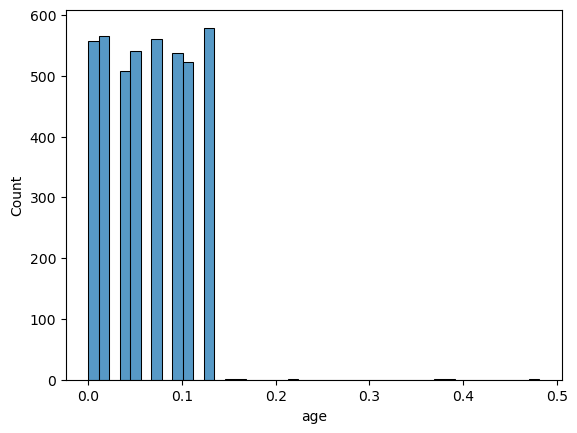

In [259]:
sns.histplot(extreme_errors_df['age'])

In [265]:
extreme_errors_df['income_level'] = 0

In [269]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [268]:
df_inversed = pd.DataFrame()
df_inversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])

In [270]:
df_inversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,20.0,2.0,1.0,9.0,1.0
1,25.0,1.0,1.0,3.0,1.0
2,19.0,1.0,1.0,1.0,2.0
3,18.0,0.0,1.0,11.0,2.0
4,25.0,1.0,1.0,6.0,1.0


In [271]:
df_inversed = df_inversed.drop(columns = 'income_level')

In [272]:
df_inversed.head()

,age,number_of_dependants,income_lakhs,insurance_plan
0,20.0,2.0,9.0,1.0
1,25.0,1.0,3.0,1.0
2,19.0,1.0,1.0,2.0
3,18.0,0.0,11.0,2.0
4,25.0,1.0,6.0,1.0


<Axes: xlabel='age', ylabel='Count'>

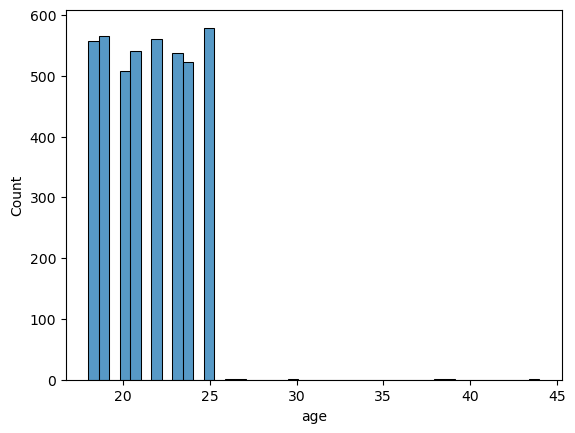

In [273]:
sns.histplot(df_inversed['age'])

In [278]:
df_inversed['age'].quantile(.95)

25.0

In [279]:
# so the errors are occuring for age <= 25

In [293]:
# We can use one model for age > 25 and another for age <25

### Model Segmentation

In [294]:
# To address age < 25 we can ask for more features, data, do some feature engineering